In [19]:
import os
os.environ['autocnet_config'] = '/home/jlaura/autocnet_projects/demo.yml'
from autocnet_server.graph.graph import NetworkCandidateGraph
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jlaura/anaconda3/envs/ct/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['floor', 'modf', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


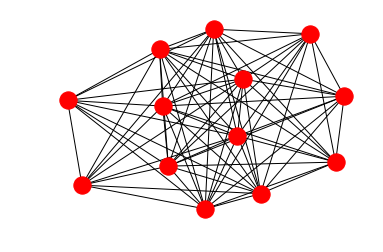

In [20]:
ncg = NetworkCandidateGraph.from_database()
ncg.plot()

In [ ]:
from skimage.feature import register_translation
from math import modf, floor

def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product

def apply_plot(r, a, b, xsize=200, ysize=200):
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)
    axr, ax = modf(r.source_x-xsize)
    ayr, ay = modf(r.source_y-ysize)
    bxr, bx = modf(r.destination_x-xsize)
    byr, by = modf(r.destination_y-ysize)
    
    if ax + xsize * 2 > a.raster_size[0]:
        xsize = floor(a.raster_size[0] - r.source_x)
    if ay + ysize * 2 > a.raster_size[1]:
        ysize = floor(a.raster_size[1] - r.source_y)
    if bx + xsize * 2 > b.raster_size[0]:
        xsize = floor(b.raster_size[0] - r.destination_x)
    if by + ysize * 2 > b.raster_size[1]:
        ysize = floor(b.raster_size[1] - r.destination_y)
        
    asub = a.read_array(pixels=(int(ax), int(ay), xsize*2, ysize*2))
    bsub = b.read_array(pixels=(int(bx), int(by), xsize*2, ysize*2)) 

    (y_shift, x_shift), error, diffphase = register_translation(asub, bsub,
                                                                upsample_factor=100,
                                                                space='real')  
    
    
    # Pull the sub images from A and B to apply NCC
    amini = asub[ysize-25:ysize+26,xsize-25:ysize+26]
    newx = int(xsize - x_shift+bxr)
    newy = int(ysize - y_shift+byr)
    bmini = bsub[newy-25:newy+26, newx-25:newx+26]
        
    try:
        fig.suptitle('Error: {}\nPhase Diff:{}\nCorr:{}'.format(error, diffphase, correlation_coefficient(amini, bmini)),
                    y=1.1)
    except:
        fig.suptitle('ERR')
    #if error > 0.03:
    #    return
    ax1.imshow(asub, cmap='Greys')
    ax1.plot(xsize+axr,ysize+ayr, 'bo')
    ax2.imshow(bsub, cmap='Greys')
    ax2.plot(xsize+bxr,ysize+byr,'bo')
    ax2.plot(xsize - x_shift+bxr, ysize - y_shift+byr, 'ro')

    ax3.imshow(amini, cmap='Greys')
    ax4.imshow(bmini, cmap='Greys')
    #ax3.imshow(sc, cmap='Greys')
    return fig

for s,d,e in ncg.edges(data='data'):

    #if s == 25:
    #    continue
    key = (s,d)
    if d < s:
        s,d = d,s
    e = ncg.edges[(s,d)]['data']
    a = ncg.node[s]['data'].geodata
    b = ncg.node[d]['data'].geodata

    figs = e.matches.apply(apply_plot, args=(a,b, 200, 200), axis=1)
    
    break

In [ ]:
e.matches.tail

In [ ]:
from skimage import transform as tf

In [ ]:
tf.AffineTransform?

In [ ]:
import plio
plio.__file__

In [ ]:
e = ncg.edges[(17,20)]['data']
e.matches

from skimage.transform import warp, AffineTransform
from skimage.measure import ransac

src = e.matches[['source_x', 'source_y']].values
dst = e.matches[['destination_x', 'destination_y']].values

model = AffineTransform()
model.estimate(src, dst)

model_robust, inliers = ransac((src, dst), AffineTransform, min_samples=7,
                               residual_threshold=2, max_trials=100)

outliers = inliers == False

In [ ]:
model_robust.shear

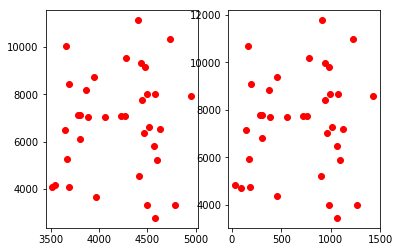

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(e.matches.source_x, e.matches.source_y, 'ro')
ax2.plot(e.matches.destination_x, e.matches.destination_y, 'ro')
show()
#e.matches

In [ ]:
s = 19
d = 20

    
                             
def apply_plot(r, a, b):
    fig, (ax1, ax2) = plt.subplots(1,2)
    asub = a.read_array(pixels=(int(r.source_x-500), int(r.source_y-500), 1000, 1000))
    bsub = b.read_array(pixels=(int(r.destination_x-500), int(r.destination_y-500), 1000, 1000)) 
          
    ax1.imshow(asub, cmap='Greys')
    ax2.imshow(bsub, cmap='Greys')
    #ax3.imshow(sc, cmap='Greys')
    return fig

e = ncg.edges[(s,d)]['data']
a = ncg.node[d]['data'].geodata
b = ncg.node[s]['data'].geodata
 
figs = e.matches.apply(apply_plot, args=(a,b), axis=1)
#figs = None

In [ ]:
figs = e.matches.tail(5).apply(apply_plot, args=(a,b), axis=1)
